# 나이브 베이스 분류기(Naive Bayes Classification)

* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정 (naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
  * 가우시안 나이브 베이즈 분류기
  * 베르누이 나이브 베이즈 분류기
  * 다항 나이브 베이즈 분류기

## 나이브 베이즈 분류기의 확률 모델

* 나이브 베이즈는 조건부 확률 모델
* *N*개의 특성을 나타내는 벡터 **x**를 입력 받아 k개의 가능한 확률적 결과를 출력

\begin{equation}
p(C_k | x_1,...,x_n)
\end{equation}

* 위의 식에 베이즈 정리를 적용하면 다음과 같음

\begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation}

* 위의 식에서 분자만이 출력 값에 영향을 받기 때문에 분모 부분을 상수로 취급할 수 있음

\begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation}

* 위의 식을 연쇄 법칙을 사용해 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation}

* 나이브 베이즈 분류기는 모든 특성이 독립이라고 가정하기 때문에 위의 식을 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\
& \propto p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{split}
\end{equation}

* 위의 식을 통해 나온 값들 중 가장 큰 값을 갖는 클래스가 예측 결과

\begin{equation}
\hat{y} = \underset{k}{\arg\max} \; p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{equation}

In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics

prior = [0.45, 0.3, 0.15, 0.1]
likelihood = [[0.3, 0.3, 0.4], 
              [0.7, 0.2, 0.], 
              [0.15, 0.5, 0.35], 
              [0.6, 0.2, 0.2]]
idx = 0
for c, xs in zip(prior, likelihood):
    res = 1.0
    for x in xs:
        res *= x
    res *= c
    idx += 1
    print(f"{idx}번 째 클래스의 가능성: {res}")

1번 째 클래스의 가능성: 0.0162
2번 째 클래스의 가능성: 0.0
3번 째 클래스의 가능성: 0.0039375
4번 째 클래스의 가능성: 0.0024000000000000002


## 산림 토양 데이터
* 산림 지역 토양의 특징 데이터
* 토양이 어떤 종류에 속하는지 예측
* https://archive.ics.uci.edu/ml/datasets/Covertype 에서 데이터의 자세한 설명 확인 가능

In [23]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

.. _covtype_dataset:

산림 피복 유형
-----------------

이 데이터 세트의 샘플은 미국 숲의 30×30m 패치에 해당합니다.
각 패치의 커버 유형을 예측하는 작업을 위해 수집되었으며,
즉, 나무의 지배적인 종.
7가지 표지 유형이 있으므로 다중 클래스 분류 문제가 발생합니다.
각 샘플에는 54개의 기능이 있으며,
`데이터세트 홈페이지 <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
일부 기능은 부울 표시기입니다.
다른 것들은 이산적이거나 연속적인 측정입니다.

**데이터 세트 특성:**

    =================   ============
    Classe              7
    샘플 총              581012
    Dimensionality 차원  54
    Features 기능        int 정수
    =================   ============

:func:`sklearn.datasets.fetch_covtype`은 Covertype 데이터 세트를 로드합니다.
사전과 같은 'Bunch' 객체를 반환합니다.
``data`` 멤버의 기능 매트릭스를 사용하여
``target``의 목표 값. 선택적 인수 'as_frame'이 다음과 같은 경우
'True'로 설정하면 ``data`` 및 ``target``을 팬더로 반환합니다.
데이터 프레임이 있고 추가 멤버 ``frame``도 있을 것입니다.
필요한 경우 데이터 세트는 웹에서 다운로드됩니다.

In [25]:
pd.DataFrame(covtype.data, columns=covtype.feature_names)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
covtype.target

array([5, 5, 2, ..., 3, 3, 3])

## 학습, 평가 데이터 분류

In [33]:
covtype_X = covtype.data
covtype_y = covtype.target

cov_X_train, cov_X_test, cov_y_train, cov_y_test = train_test_split(covtype_X, covtype_y, test_size=0.2)

print(f"전체 데이터 크기: {covtype_X.shape}")
print(f"학습 데이터 크기: {cov_X_train.shape}")
print(f"평가 데이터 크기: {cov_X_test.shape}")

전체 데이터 크기: (581012, 54)
학습 데이터 크기: (464809, 54)
평가 데이터 크기: (116203, 54)


## 전처리
-
### 전처리 전 데이터

In [34]:
covtype_df = pd.DataFrame(covtype.data, columns=covtype.feature_names)
covtype_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
covtype_tr_df = pd.DataFrame(cov_X_train)
covtype_tr_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,...,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.101609,155.731739,14.103208,269.362646,46.378734,2350.202780,212.134784,223.330858,142.554677,1979.226338,...,0.044201,0.090282,0.077548,0.002793,0.003234,0.000207,0.000529,0.026833,0.023676,0.015019
std,280.252517,111.945424,7.485124,212.538297,58.243665,1560.036141,26.771966,19.764082,38.258515,1323.394214,...,0.205542,0.286586,0.267459,0.052771,0.056773,0.014370,0.022999,0.161594,0.152039,0.121629
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1104.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3330.000000,231.000000,237.000000,168.000000,2549.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,65.000000,1397.000000,599.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 전처리 후 데이터
* 평균은 0에 가깝게, 표준평차는 1에 가깝게 정규화

In [41]:
# Train DataFrame describe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cov_X_train_scal = scaler.fit_transform(cov_X_train)

covtype_tr_df = pd.DataFrame(cov_X_train_scal)
covtype_tr_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,...,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05
mean,4.104956e-16,-1.186865e-16,4.469851e-17,2.289958e-17,1.829826e-17,2.231868e-18,8.435239e-17,5.620027e-16,2.099026e-16,4.047936e-17,...,-6.681082e-17,-9.416649e-18,-9.462509e-18,5.364127e-17,1.470587e-17,-9.829392e-18,-3.363089e-18,2.940410e-17,-2.482571e-17,4.293289e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.925398e+00,-1.391141e+00,-1.884167e+00,-1.267362e+00,-3.766572e+00,-1.506507e+00,-7.923774e+00,-1.129985e+01,-3.726094e+00,-1.495570e+00,...,-2.150466e-01,-3.150270e-01,-2.899435e-01,-5.291848e-02,-5.695679e-02,-1.437286e-02,-2.301152e-02,-1.660493e-01,-1.557259e-01,-1.234831e-01
25%,-5.355947e-01,-8.730312e-01,-6.817807e-01,-7.592176e-01,-6.761040e-01,-7.988303e-01,-5.279702e-01,-5.227093e-01,-6.156722e-01,-7.218011e-01,...,-2.150466e-01,-3.150270e-01,-2.899435e-01,-5.291848e-02,-5.695679e-02,-1.437286e-02,-2.301152e-02,-1.660493e-01,-1.557259e-01,-1.234831e-01
50%,1.316614e-01,-2.566587e-01,-1.473869e-01,-2.416633e-01,-2.812109e-01,-2.283301e-01,2.190807e-01,1.350503e-01,1.163984e-02,-2.034365e-01,...,-2.150466e-01,-3.150270e-01,-2.899435e-01,-5.291848e-02,-5.695679e-02,-1.437286e-02,-2.301152e-02,-1.660493e-01,-1.557259e-01,-1.234831e-01
75%,7.275532e-01,9.403544e-01,5.206054e-01,5.393733e-01,3.883906e-01,6.280613e-01,7.046638e-01,6.916160e-01,6.650899e-01,4.305401e-01,...,-2.150466e-01,-3.150270e-01,-2.899435e-01,-5.291848e-02,-5.695679e-02,-1.437286e-02,-2.301152e-02,-1.660493e-01,-1.557259e-01,-1.234831e-01
max,3.207462e+00,1.824715e+00,6.799733e+00,5.305578e+00,9.488103e+00,3.055572e+00,1.563772e+00,1.551763e+00,2.912958e+00,3.924590e+00,...,4.650156e+00,3.174331e+00,3.448948e+00,1.889699e+01,1.755717e+01,6.957557e+01,4.345650e+01,6.022309e+00,6.421539e+00,8.098272e+00


In [44]:
# Test DataFrame describe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cov_X_test_scal = scaler.fit_transform(cov_X_test)

covtype_te_df = pd.DataFrame(cov_X_test_scal)
covtype_te_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,...,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05,1.162030e+05
mean,7.848788e-16,-7.001295e-17,-3.598482e-17,-9.378372e-17,-3.864470e-17,-5.992374e-17,9.309582e-17,-2.076541e-16,-4.665491e-17,-4.534026e-17,...,-1.384972e-17,-1.657075e-17,5.075174e-18,-2.751600e-18,8.805122e-18,1.167902e-17,3.729947e-18,-6.261420e-17,-3.546507e-18,2.549816e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.888085e+00,-1.389768e+00,-1.880583e+00,-1.268574e+00,-3.633787e+00,-1.510110e+00,-5.911138e+00,-9.767496e+00,-3.714887e+00,-1.495082e+00,...,-2.147116e-01,-3.160811e-01,-2.916438e-01,-5.196958e-02,-5.788066e-02,-1.407013e-02,-2.115876e-02,-1.655830e-01,-1.571615e-01,-1.243330e-01
25%,-5.429022e-01,-8.709213e-01,-6.806947e-01,-7.605622e-01,-6.765610e-01,-7.968005e-01,-5.302800e-01,-5.190332e-01,-6.109447e-01,-7.228876e-01,...,-2.147116e-01,-3.160811e-01,-2.916438e-01,-5.196958e-02,-5.788066e-02,-1.407013e-02,-2.115876e-02,-1.655830e-01,-1.571615e-01,-1.243330e-01
50%,1.275685e-01,-2.536722e-01,-1.474110e-01,-2.431426e-01,-2.834038e-01,-2.229395e-01,2.170614e-01,1.379614e-01,1.506051e-02,-2.053290e-01,...,-2.147116e-01,-3.160811e-01,-2.916438e-01,-5.196958e-02,-5.788066e-02,-1.407013e-02,-2.115876e-02,-1.655830e-01,-1.571615e-01,-1.243330e-01
75%,7.299165e-01,9.360977e-01,5.191935e-01,5.659137e-01,3.832541e-01,6.208226e-01,7.028333e-01,6.938799e-01,6.671493e-01,4.290006e-01,...,-2.147116e-01,-3.160811e-01,-2.916438e-01,-5.196958e-02,-5.788066e-02,-1.407013e-02,-2.115876e-02,-1.655830e-01,-1.571615e-01,-1.243330e-01
max,3.193089e+00,1.830662e+00,6.918597e+00,5.203876e+00,9.477152e+00,3.038365e+00,1.562276e+00,1.553027e+00,2.884251e+00,3.885418e+00,...,4.657410e+00,3.163745e+00,3.428840e+00,1.924203e+01,1.727693e+01,7.107253e+01,4.726175e+01,6.039267e+00,6.362881e+00,8.042918e+00


## 20 Newsgroup 데이터
* 뉴스 기사가 어느 그룹에 속하는지 분류
* 뉴스 기사는 텍스트 데이터이기 때문에 특별한 전처리 과정이 필요

In [47]:
from sklearn.datasets import fetch_20newsgroups
newsgroup = fetch_20newsgroups()
print(newsgroup.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

.. _20newsgroups_dataset:

20개 뉴스그룹 텍스트 데이터 세트
------------------------------

20개의 뉴스그룹 데이터세트는 약 18,000개의 뉴스그룹 게시물로 구성됩니다.
20개의 주제가 두 개의 하위 집합으로 나뉩니다. 하나는 교육(또는 개발)용입니다.
다른 하나는 테스트용(또는 성능 평가용)입니다. 분할
열차와 테스트 세트 사이의 전송은 이전에 게시된 메시지를 기반으로 합니다.
그리고 특정 날짜 이후.

이 모듈에는 두 개의 로더가 포함되어 있습니다. 첫번째,
:func:`sklearn.datasets.fetch_20newsgroups`,
텍스트 기능에 제공할 수 있는 원시 텍스트 목록을 반환합니다.
:class:`~sklearn.feature_extraction.text.CountVectorizer`와 같은 추출기
특징 벡터를 추출하기 위해 맞춤 매개변수를 사용합니다.
두 번째는 :func:`sklearn.datasets.fetch_20newsgroups_Vectorized`입니다.
즉시 사용 가능한 기능을 반환합니다. 즉, 기능을 사용할 필요가 없습니다.
추출기.

**데이터 세트 특성:**

    =================   ==========
    Classe                      20
    샘플 총                 18846개
    Dimensionality 차원           1
    Features                  text
    =================   ==========

용법
~~~~~

:func:`sklearn.datasets.fetch_20newsgroups` 함수는 데이터입니다.
데이터 아카이브를 다운로드하는 가져오기/캐싱 기능
원본 `20개 뉴스그룹 웹사이트`_, 아카이브 내용 추출
``~/scikit_learn_data/20news_home`` 폴더에서
:func:`sklearn.datasets.load_files` 훈련 또는
테스트 세트 폴더 또는 둘 다::

  >>> sklearn.datasets에서 import fetch_20newsgroups
  >>> newsgroups_train = fetch_20newsgroups(subset='train')

  >>> pprint에서 pprint 가져오기
  >>> pprint(목록(newsgroups_train.target_names))
  
  ['alt.atheism',
   'comp.graphics',
   'comp.os.ms-windows.misc',
   'comp.sys.ibm.pc.hardware',
   'comp.sys.mac.hardware',
   'comp.windows.x',
   'misc.forsale'
   'comp.os.ms-windows.misc',
   'comp.sys.ibm.pc.hardware',
   'comp.sys.mac.hardware',
   'comp.windows.x',
   'misc.forsale',
   'rec.autos',
   'rec.motorcycles',
   'rec.sport.baseball',
   'rec.sport.hockey',
   'sci.crypt',
   'sci.electronics',
   'sci.med',
   'sci.space',
   'soc.religion.christian',
   'talk.politics.guns',
   'talk.politics.mideast',
   'talk.politics.misc',
   'talk.religion.misc']

실제 데이터는 ``filenames`` 및 ``target`` 속성에 있습니다. 목표
속성은 카테고리의 정수 인덱스입니다::

  >>> 뉴스그룹_train.filenames.shape
  (11314,)
  >>> 뉴스그룹_train.target.shape
  (11314,)
  >>> 뉴스그룹_train.target[:10]
  배열([7, 4, 4, 1, 14, 16, 13, 3, 2, 4])

다음을 전달하여 카테고리의 하위 선택만 로드할 수 있습니다.
로드할 카테고리 목록
:func:`sklearn.datasets.fetch_20newsgroups` 함수::

  >>> 고양이 = ['alt.atheism', 'sci.space']
  >>> newsgroups_train = fetch_20newsgroups(subset='train', 카테고리=고양이)

  >>> 목록(newsgroups_train.target_names)
  ['alt.atheism', 'sci.space']
  >>> 뉴스그룹_train.filenames.shape
  (1073,)
  >>> 뉴스그룹_train.target.shape
  (1073,)
  >>> 뉴스그룹_train.target[:10]
  배열([0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

텍스트를 벡터로 변환
~~~~~~~~~~~~~~~~~~~~~~~~~~

예측 또는 클러스터링 모델에 텍스트 데이터를 제공하려면
먼저 텍스트를 적절한 숫자 값의 벡터로 변환해야 합니다.
통계 분석을 위해. 이는 유틸리티를 사용하여 달성할 수 있습니다.
다음과 같이 ``sklearn.feature_extraction.text``
유니그램 토큰의 `TF-IDF`_ 벡터를 추출하는 예
20news의 하위 집합에서::

  >>> sklearn.feature_extraction.text에서 TfidfVectorizer 가져오기
  >>> 카테고리 = ['alt.atheism', 'talk.religion.misc',
  ... 'comp.graphics', 'sci.space']
  >>> newsgroups_train = fetch_20newsgroups(subset='train',
  ... 카테고리=카테고리)
  >>> 벡터화기 = TfidfVectorizer()
  >>> 벡터 = vectorizer.fit_transform(newsgroups_train.data)
  >>> 벡터.모양
  (2034, 34118)

추출된 TF-IDF 벡터는 매우 희박하며 평균 0이 아닌 159개입니다.
30000차원 이상의 공간에서 샘플별 구성요소
(0이 아닌 특성이 0.5% 미만)::

  >>> 벡터.nnz / float(벡터.모양[0])
  159.01327...

:func:`sklearn.datasets.fetch_20newsgroups_Vectorized`는 다음을 수행하는 함수입니다.
파일 이름 대신 바로 사용할 수 있는 토큰 계산 기능을 반환합니다.

.. _`20개 뉴스그룹 웹사이트`: http://people.csail.mit.edu/jrennie/20Newsgroups/ 
.. _`TF-IDF`: https://en.wikipedia.org/wiki/Tf-idf


보다 현실적인 훈련을 위해 텍스트 필터링
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

분류기가 특정 항목에 과적합되기 쉽습니다.
뉴스그룹 헤더와 같은 20개의 뉴스그룹 데이터. 많은 분류자는 매우
F-점수는 높지만 그 결과는 다음과 같은 다른 문서로 일반화되지 않습니다.
이 시간대에 있지 않습니다.

예를 들어, 다항 Naive Bayes 분류기의 결과를 살펴보겠습니다.
훈련이 빠르고 적절한 F-점수를 달성합니다.

  >>> sklearn.naive_bayes에서 MultinomialNB 가져오기
  >>> sklearn 가져오기 측정항목에서
  >>> 뉴스그룹_테스트 = fetch_20뉴스그룹(하위 집합='테스트',
  ... 카테고리=카테고리)
  >>> 벡터_테스트 = 벡터라이저.변환(뉴스그룹_테스트.데이터)
  >>> clf = 다항NB(알파=.01)
  >>> clf.fit(벡터, 뉴스그룹_train.target)
  다항NB(알파=0.01, class_prior=없음, fit_prior=True)

  >>> pred = clf.predict(벡터_테스트)
  >>>metrics.f1_score(newsgroups_test.target, pred,average='macro')
  0.88213...

(예:ref:`sphx_glr_auto_examples_text_plot_document_classification_20newsgroups.py` 셔플
시간별로 분할하는 대신 훈련 및 테스트 데이터를 사용합니다.
다항식 Naive Bayes는 훨씬 더 높은 F-점수 0.88을 얻습니다. 당신은 의심 스럽습니까?
아직 이 분류기 내부에서는 무슨 일이 벌어지고 있는 걸까요?)

가장 유익한 기능이 무엇인지 살펴보겠습니다.

  >>> numpy를 np로 가져오기
  >>> def show_top10(분류자, 벡터화기, 카테고리):
  ... feature_names = vectorizer.get_feature_names_out()
  ... i의 경우 열거(범주)의 범주:
  ... top10 = np.argsort(classifier.coef_[i])[-10:]
  ... print("%s: %s" % (범주, " ".join(feature_names[top10])))
  ...
  >>> show_top10(clf, 벡터화 도구, 뉴스그룹_train.target_names)
  alt.atheism: 그것을 교육하고 당신 안에 있는 것
  comp.graphics: 그래픽 분야의 edu는
  sci.space: 에듀(edu)는 공간에 속해 있습니다.
  talk.religion.misc: 당신이 속한 게 아니라 저것과


이제 이러한 기능이 과적합된 많은 사항을 확인할 수 있습니다.

- 거의 모든 그룹은 다음과 같은 헤더 여부로 구분됩니다.
  ``NNTP-Posting-Host:`` 및 ``Distribution:``은 다소 자주 나타납니다.
- 또 다른 중요한 특징은 보낸 사람이 다음과 관련이 있는지 여부입니다.
  헤더나 서명으로 표시된 대학.
- "기사"라는 단어는 사람들이 얼마나 자주 인용하는지에 따라 중요한 특징입니다.
  이전 게시물은 다음과 같습니다: "기사에서 [기사 ID], [이름] <[이메일 주소]>
  썼다:"
- 기타 기능은 특정인의 이름 및 이메일 주소와 일치합니다.
  그 당시에 포스팅 중이었어.

뉴스 그룹을 구별하는 풍부한 단서가 있는 분류자는
텍스트에서 주제를 거의 식별할 필요가 없으며 모두
같은 높은 수준.

이러한 이유로 20개의 뉴스그룹 데이터를 로드하는 기능은
제거할 정보의 종류를 알려주는 **remove**라는 매개변수
각 파일의. **제거**는 다음의 하위 집합을 포함하는 튜플이어야 합니다.
``('headers', 'footers', 'quotes')``, 헤더, 서명을 제거하라고 지시
블록과 인용 블록이 각각 포함됩니다.

  >>> 뉴스그룹_테스트 = fetch_20뉴스그룹(하위 집합='테스트',
  ... 제거=('머리글', '바닥글', '따옴표'),
  ... 카테고리=카테고리)
  >>> 벡터_테스트 = 벡터라이저.변환(뉴스그룹_테스트.데이터)
  >>> pred = clf.predict(벡터_테스트)
  >>>metrics.f1_score(pred,newsgroups_test.target,average='macro')
  0.77310...

이 분류기는 F-점수를 많이 잃었습니다. 단지 우리가 제거했기 때문입니다.
주제 분류와 관련이 거의 없는 메타데이터입니다.
훈련 데이터에서 이 메타데이터도 제거하면 훨씬 더 많은 손실이 발생합니다.

  >>> newsgroups_train = fetch_20newsgroups(subset='train',
  ... 제거=('머리글', '바닥글', '따옴표'),
  ... 카테고리=카테고리)
  >>> 벡터 = vectorizer.fit_transform(newsgroups_train.data)
  >>> clf = 다항NB(알파=.01)
  >>> clf.fit(벡터, 뉴스그룹_train.target)
  다항NB(알파=0.01, class_prior=없음, fit_prior=True)

  >>> 벡터_테스트 = 벡터라이저.변환(뉴스그룹_테스트.데이터)
  >>> pred = clf.predict(벡터_테스트)
  >>>metrics.f1_score(newsgroups_test.target, pred,average='macro')
  0.76995...

일부 다른 분류기는 이 어려운 버전의 작업에 더 잘 대처합니다. 시도해 보세요
:ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_text_feature_extraction.py`
결과를 비교하기 위해 `remove` 옵션이 있는 경우와 없는 경우의 예입니다.

.. 주제:: 데이터 고려 사항

  클리블랜드 인디언스(Cleveland Indians)는 클리블랜드를 연고로 하는 메이저 리그 야구팀이다.
  미국 오하이오. 2020년 12월, "몇 달 간의 활동 끝에
  조지 플로이드의 죽음과 국가적 청산으로 촉발된 논의
  인종과 식민주의 때문에 클리블랜드 인디언스는 자신들의 방식을 바꾸기로 결정했습니다.
  이름." 팀 소유자인 Paul Dolan은 "팀이 성공하지 못할 것임을 분명히 했습니다.
  비공식적인 별명인 Tribe, 새로운 팀 이름입니다." "그렇지는 않을 거예요.
  인디언들로부터 반걸음 떨어져 있어야 합니다." Dolan이 말했습니다. "우리는 원주민을 갖지 않을 것입니다.
  미국 테마의 이름입니다."

  https://www.mlb.com/news/cleveland-indians-team-name-change

.. 주제:: 권장사항

  - 20개 뉴스그룹 데이터에 대한 텍스트 분류기를 평가할 때
    뉴스그룹 관련 메타데이터를 제거해야 합니다. scikit-learn에서는 다음을 수행할 수 있습니다.
    ``remove=('headers', 'footers', 'quotes')``를 설정하면 됩니다. F-점수는 다음과 같습니다.
    더 현실적이기 때문에 더 낮습니다.
  - 이 텍스트 데이터 세트에는 특정 NLP에 부적절할 수 있는 데이터가 포함되어 있습니다.
    응용 프로그램. 예는 "데이터 고려 사항" 섹션에 나열되어 있습니다.
    위에. 다음과 같은 작업을 위해 NLP에서 현재 텍스트 데이터 세트를 사용하는 데 따른 과제
    문장 완성, 클러스터링 및 기타 응용 프로그램은 텍스트입니다.
    그것은 문화적으로 편견이 있고 선동적인 것은 편견을 전파할 것입니다. 이것
    데이터 세트를 사용할 때 고려해야 할 사항은 다음과 같습니다.
    출력, 편향은 문서화되어야 합니다.

.. 주제:: 예

   * :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_text_feature_extraction.py`

   * :ref:`sphx_glr_auto_examples_text_plot_document_classification_20newsgroups.py`

   * :ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_Vectorizer.py`

   * :ref:`sphx_glr_auto_examples_text_plot_document_clustering.py`


In [49]:
newsgroup.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## 학습, 평가 데이터 분류

In [57]:
newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

news_X_train, news_y_train = newsgroup_train['data'], newsgroup_train['target']
news_X_test, news_y_test = newsgroup_test['data'], newsgroup_test['target']

## 벡터화
* 텍스트 데이터는 기계학습 모델에 입력 할 수 없음
* 벡터화는 텍스트 데이터를 실수 벡터로 변환해 기계학습 모델에 입력 할 수 있도록 하는 전처리 과정
* Scikit-learn에서는 Count, Tf-idf, Hashing 세가지 방법을 지원

## CountVectorizer
* 문서에 나온 단어의 수를 세서 벡터 생성

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
Cnt_vector = CountVectorizer()

X_train_count = Cnt_vector.fit_transform(news_X_train)
X_test_count = Cnt_vector.transform(news_X_test)

### 데이터를 희소 행렬 형태로 표현

In [62]:
X_train_count

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [63]:
for v in X_train_count[0]:
    print(v)

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


### HashingVectorizer
* 각 단어를 해쉬 값으로 표현
* 미리 정해진 크기의 벡터로 표현

In [165]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vector = HashingVectorizer(n_features=1000)

X_train_hash = hash_vector.fit_transform(news_X_train)
X_test_hash = hash_vector.transform(news_X_test)

In [67]:
X_train_hash

<11314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1550687 stored elements in Compressed Sparse Row format>

In [69]:
print(X_train_hash[0])

  (0, 80)	-0.0642824346533225
  (0, 108)	0.0642824346533225
  (0, 111)	-0.128564869306645
  (0, 145)	0.0642824346533225
  (0, 158)	0.0642824346533225
  (0, 159)	-0.0642824346533225
  (0, 161)	0.0642824346533225
  (0, 165)	-0.0642824346533225
  (0, 171)	0.0642824346533225
  (0, 182)	0.0642824346533225
  (0, 195)	-0.0642824346533225
  (0, 196)	0.19284730395996752
  (0, 205)	-0.0642824346533225
  (0, 209)	0.0642824346533225
  (0, 234)	0.0642824346533225
  (0, 237)	0.0642824346533225
  (0, 248)	0.0642824346533225
  (0, 265)	0.19284730395996752
  (0, 274)	0.0642824346533225
  (0, 277)	0.19284730395996752
  (0, 284)	-0.0642824346533225
  (0, 286)	-0.0642824346533225
  (0, 296)	0.0642824346533225
  (0, 362)	-0.0642824346533225
  (0, 364)	-0.0642824346533225
  :	:
  (0, 739)	0.0
  (0, 761)	-0.0642824346533225
  (0, 766)	0.0642824346533225
  (0, 800)	-0.0642824346533225
  (0, 812)	-0.0642824346533225
  (0, 842)	0.0642824346533225
  (0, 848)	-0.0642824346533225
  (0, 851)	0.0642824346533225
  (0

### TfidfVectorizer
* 문서에 나온 단어 빈도(term frequency)와 역문서 빈도(inverse document frequency)를 곱해서 구함
* 각 빈도는 일반적으로 로그 스케일링 후 사용
* $tf(t, d) = log(f(t, d) + 1)$
* $idf(t, D) = \frac{|D|}{|d \in D : t \in d| + 1}$
* $tfidf(t, d, D) = tf(t, d) \times idf(t, D)$

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vector = TfidfVectorizer()

X_train_Tfidf = Tfidf_vector.fit_transform(news_X_train)
X_test_Tfidf = Tfidf_vector.transform(news_X_test)

In [79]:
X_train_Tfidf

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [81]:
print(X_train_Tfidf[0])

  (0, 128420)	0.04278499079283093
  (0, 128402)	0.05922294083277842
  (0, 128026)	0.060622095889758885
  (0, 124931)	0.08882569909852546
  (0, 124031)	0.10798795154169122
  (0, 123989)	0.08207027465330353
  (0, 123984)	0.036854292634593756
  (0, 123796)	0.049437556160455476
  (0, 123292)	0.14534718515938805
  (0, 123162)	0.2597090245735688
  (0, 118983)	0.037085978050619146
  (0, 118280)	0.2118680720828169
  (0, 115475)	0.042472629883573
  (0, 114731)	0.14447275512784058
  (0, 114688)	0.06214070986309586
  (0, 114579)	0.03671830826216751
  (0, 114455)	0.12287762616208957
  (0, 114428)	0.05511105154696676
  (0, 113986)	0.17691750674853082
  (0, 111322)	0.01915671802495043
  (0, 109581)	0.10809248404447917
  (0, 109271)	0.10844724822064673
  (0, 108252)	0.07526015712540636
  (0, 106116)	0.09869734624201922
  (0, 104813)	0.08462829788929047
  :	:
  (0, 56979)	0.057470154074851294
  (0, 51793)	0.13412921037839678
  (0, 51730)	0.09714744057976722
  (0, 50527)	0.054614286588587246
  (0, 5011

## 가우시안 나이브 베이즈

* 입력 특성이 가우시안(정규) 분포를 갖는다고 가정

### 토양 데이터

In [87]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(cov_X_train_scal, cov_y_train)

GaussianNB()

In [89]:
pred = model.predict(cov_X_train_scal)
acc = metrics.accuracy_score(cov_y_train, pred)
f1 = metrics.f1_score(cov_y_train, pred, average=None)

print(f"Train Accuracy score: {acc}")
print(f"Train f1_score: {f1}")

Train Accuracy score: 0.08785113885488448
Train f1_score: [0.04042399 0.01764007 0.3346139  0.13958424 0.04277124 0.07040816
 0.23676143]


In [90]:
pred = model.predict(cov_X_test_scal)
acc = metrics.accuracy_score(cov_y_test, pred)
f1 = metrics.f1_score(cov_y_test, pred, average=None)

print(f"Test Accuracy score: {acc}")
print(f"Test f1_score: {f1}")

Test Accuracy score: 0.49142448990129345
Test f1_score: [0.         0.66002934 0.         0.         0.         0.16105926
 0.02522435]


In [148]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

C:\Users\tget7\AppData\Local\Temp\ipykernel_9096\2096356913.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


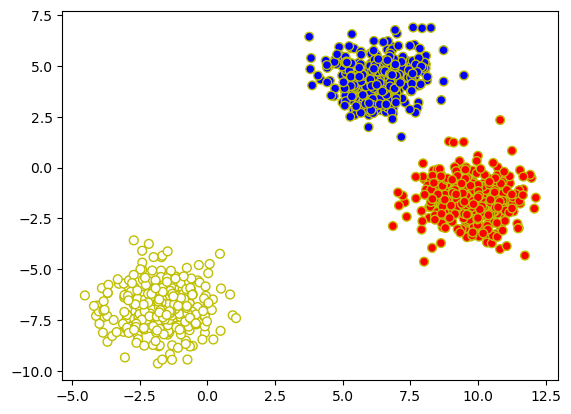

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr_r, s=40, edgecolors='y')

In [151]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

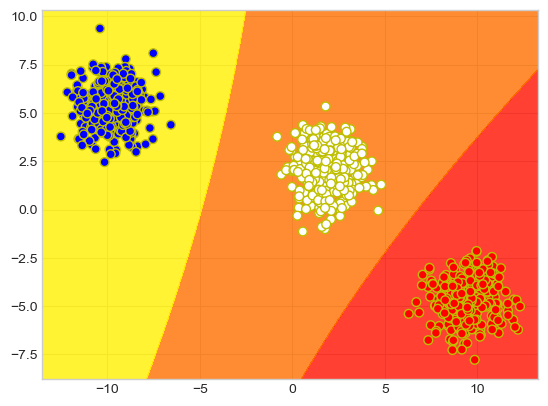

In [152]:
xx, yy = make_meshgrid(X[:, ], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr_r, s=40, edgecolors='y')

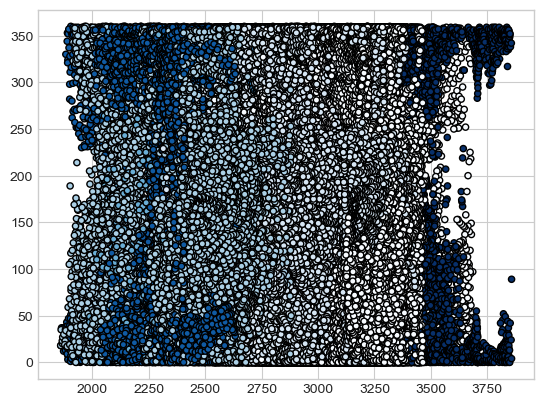

In [154]:
plt.scatter(covtype_X[:, 0], covtype_X[:, 1], c=covtype_y, cmap=plt.cm.bwr_r, s=20, edgecolors='k')

## 베르누이 나이브 베이즈

* 입력 특성이 베르누이 분포에 의해 생성된 이진 값을 갖는 다고 가정
### 학습 및 평가 (Count)

In [156]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_count, news_y_train)

BernoulliNB()

In [159]:
pred = model.predict(X_train_count)
acc = metrics.accuracy_score(news_y_train, pred)
f1 = metrics.f1_score(news_y_train, pred, average=None)

print(f"Train Accuracy score: {acc}")
print(f"Train f1_score: {f1}")

Train Accuracy score: 0.7821283365741559
Train f1_score: [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]


In [160]:
pred = model.predict(X_test_count)
acc = metrics.accuracy_score(news_y_test, pred)
f1 = metrics.f1_score(news_y_test, pred, average=None)

print(f"Test Accuracy score: {acc}")
print(f"Test f1_score: {f1}")

Test Accuracy score: 0.6307753584705258
Test f1_score: [0.47086247 0.60643564 0.01       0.56014047 0.6953405  0.70381232
 0.44829721 0.71878646 0.81797753 0.81893491 0.90287278 0.74794521
 0.61647059 0.64174455 0.76967096 0.63555114 0.64285714 0.77971474
 0.31382979 0.00793651]


### 학습 및 평가 (Hash)

In [162]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_hash, news_y_train)

BernoulliNB()

In [163]:
pred = model.predict(X_train_hash)
acc = metrics.accuracy_score(news_y_train, pred)
f1 = metrics.f1_score(news_y_train, pred, average=None)

print(f"Train Accuracy score: {acc}")
print(f"Train f1_score: {f1}")

Train Accuracy score: 0.5951917977726711
Train f1_score: [0.74226804 0.49415205 0.45039019 0.59878155 0.57327935 0.63929619
 0.35390947 0.59851301 0.72695347 0.68123862 0.79809524 0.70532319
 0.54703833 0.66862745 0.61889927 0.74707471 0.6518668  0.60485269
 0.5324165  0.54576271]


In [181]:
pred = model.predict(X_test_hash)
acc = metrics.accuracy_score(news_y_test, pred)
f1 = metrics.f1_score(news_y_test, pred, average=None)

print(f"Test Accuracy score: {acc}")
print(f"Test f1_score: {f1}")

Test Accuracy score: 0.4430430164630908
Test f1_score: [0.46678636 0.33826638 0.29391892 0.45743329 0.41939121 0.46540881
 0.34440068 0.46464646 0.62849873 0.53038674 0.63782051 0.55251799
 0.32635983 0.34266886 0.46105919 0.61780105 0.46197991 0.54591837
 0.27513228 0.3307888 ]


### 학습 및 평가 (Tf-idf)

In [185]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_Tfidf, news_y_train)

BernoulliNB()

In [186]:
pred = model.predict(X_train_Tfidf)
acc = metrics.accuracy_score(news_y_train, pred)
f1 = metrics.f1_score(news_y_train, pred, average=None)

print(f"Train Accuracy score: {acc}")
print(f"Train f1_score: {f1}")

Train Accuracy score: 0.7821283365741559
Train f1_score: [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]


In [187]:
pred = model.predict(X_test_Tfidf)
acc = metrics.accuracy_score(news_y_test, pred)
f1 = metrics.f1_score(news_y_test, pred, average=None)

print(f"Test Accuracy score: {acc}")
print(f"Test f1_score: {f1}")

Test Accuracy score: 0.6307753584705258
Test f1_score: [0.47086247 0.60643564 0.01       0.56014047 0.6953405  0.70381232
 0.44829721 0.71878646 0.81797753 0.81893491 0.90287278 0.74794521
 0.61647059 0.64174455 0.76967096 0.63555114 0.64285714 0.77971474
 0.31382979 0.00793651]


### 시각화

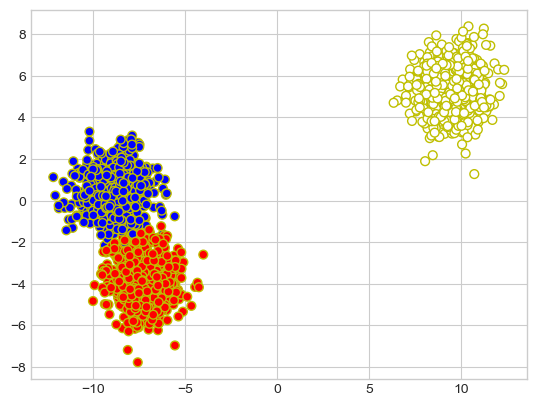

In [215]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr_r, s=40, edgecolors='y')

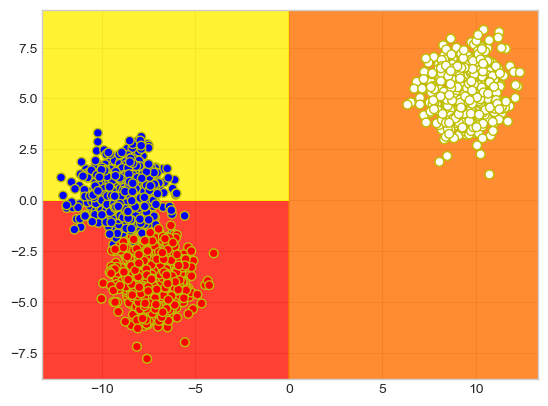

In [216]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X, y)

xx, yy = make_meshgrid(X[:, ], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr_r, s=40, edgecolors='y')

## 다항 나이브 베이즈

* 입력 특성이 다항분포에 의해 생성된 빈도수 값을 갖는 다고 가정

### 학습 및 평가 (Count)

In [229]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, news_y_train)

pred = model.predict(X_train_count)
acc = metrics.accuracy_score(news_y_train, pred)
f1 = metrics.f1_score(news_y_train, pred, average=None)

print(f"Train Accuracy score: {acc}")
print(f"Train f1_score: {f1}")

Train Accuracy score: 0.9245182959165635
Train f1_score: [0.95228426 0.904      0.25073746 0.81402003 0.96669513 0.88350983
 0.90710383 0.97014925 0.98567818 0.99325464 0.98423237 0.95399516
 0.95703454 0.98319328 0.98584513 0.95352564 0.97307002 0.97467249
 0.95157895 0.86526946]


In [230]:
pred = model.predict(X_test_count)
acc = metrics.accuracy_score(news_y_test, pred)
f1 = metrics.f1_score(news_y_test, pred, average=None)

print(f"Test Accuracy score: {acc}")
print(f"Test f1_score: {f1}")

Test Accuracy score: 0.7728359001593202
Test f1_score: [0.77901431 0.7008547  0.00501253 0.64516129 0.79178082 0.73370166
 0.76550681 0.88779285 0.93951094 0.91390728 0.94594595 0.78459938
 0.72299169 0.84635417 0.86029412 0.80846561 0.78665077 0.89281211
 0.60465116 0.48695652]


### 학습 및 평가 (Tf-idf)

In [236]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_Tfidf, news_y_train)
# Train
pred = model.predict(X_train_Tfidf)
acc = metrics.accuracy_score(news_y_train, pred)
f1 = metrics.f1_score(news_y_train, pred, average=None)
print(f"Train Accuracy score: {acc}")
print(f"Train f1_score: {f1}")

# Test
pred = model.predict(X_test_Tfidf)
acc = metrics.accuracy_score(news_y_test, pred)
f1 = metrics.f1_score(news_y_test, pred, average=None)
print(f"Test Accuracy score: {acc}")
print(f"Test f1_score: {f1}")

Train Accuracy score: 0.9326498143892522
Train f1_score: [0.87404162 0.95414462 0.95726496 0.92863002 0.97812773 0.97440273
 0.91090909 0.97261411 0.98659966 0.98575021 0.98026316 0.94033413
 0.9594478  0.98032506 0.97755611 0.77411003 0.93506494 0.97453907
 0.90163934 0.45081967]
Test Accuracy score: 0.7738980350504514
Test f1_score: [0.63117871 0.72       0.72778561 0.72104019 0.81309686 0.81643836
 0.7958884  0.88135593 0.93450882 0.91071429 0.92917167 0.73583093
 0.69732938 0.81907433 0.86559803 0.60728118 0.76286353 0.92225201
 0.57977528 0.24390244]


### 시각화

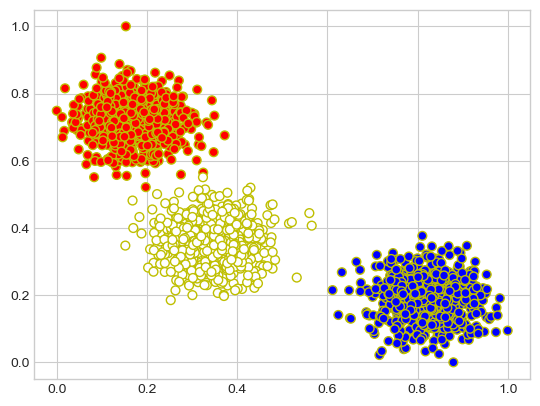

In [249]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr_r, s=40, edgecolors='y')

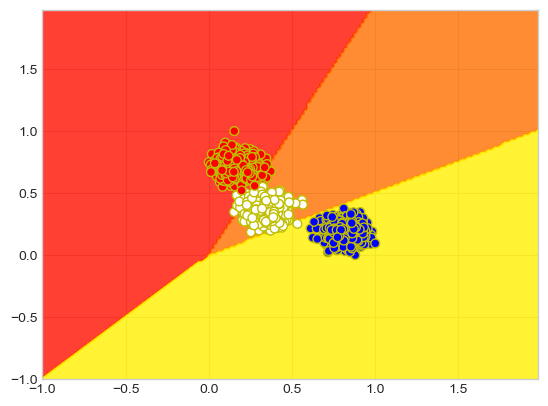

In [250]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

xx, yy = make_meshgrid(X[:, ], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr_r, s=40, edgecolors='y')